In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
from pandarallel import pandarallel

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [4]:
ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'
major_isos = '../../lr_bulk/cerberus/swan/major_isos.tsv'

ver = 'v40_cerberus'

min_tpm = 1
gene_subset = 'protein_coding'
obs_col = 'sample'

mouse_ab = '../../mouse/lr_bulk/talon/mouse_talon_abundance.tsv'
mouse_filt_ab = '../../mouse/lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
mouse_read_annot = '../../mouse/lr_bulk/talon/mouse_talon_read_annot.tsv'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'
mouse_meta = '../../mouse/lr_bulk/lr_mouse_library_data_summary.tsv'
mouse_t_metadata = '../../mouse/refs/cerberus/vM25_transcript_metadata.tsv'
mouse_ver = 'vM25_cerberus'

In [5]:
def plot_major_iso_simplex(h5, gene):
    ca = cerberus.read(h5)
    
    # plotting settings
    c_dict, order = get_biosample_colors()
    c_dict[np.nan] = 'k'
    mm_tissues = ['adrenal gland', 'heart',
                  'muscle', 'brain', 'pgp1_excite_neuron',
                  'pgp1_astro', 'h9_osteocyte']
    mmap = {'v40': '*', 'v29': 'x', 'obs_det': '^', 'cerberus': '2', 'obs_major': '^'}
    subset = {'source': ['v40', 'obs_det', 'sample_major']}
    
    fname = f'figures/simplex_{gene.lower()}_major.pdf'
    
    df = ca.plot_simplex(gene=gene,
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_major']},
            size_scale=0.2,
            fname=fname)    

In [22]:
def plot_obs_obs_major_density_simplex(h5, gene):
    
    ca = cerberus.read(h5)
    
    # sample_det
    c_dict, order = get_biosample_colors()
    c_dict[np.nan] = 'k'
    mmap = {'v40': '*', 'v29': 'x', 'obs_det': '^', 'cerberus': '2', 'sample_det_centroid': 's'} 
    subset = {'source': ['v40', 'obs_det', 'sample_det']}
    fname=f'figures/simplex_{gene.lower()}_det.pdf'
    df = ca.plot_simplex(top='splicing_ratio', 
                gene=gene,
                hue='sample',
                cmap=c_dict,
                density=True,
                density_scale=50,
                density_cmap='Purples',
                size='gene_tpm', 
                log_size=True,
                sectors=True,
                marker_style='source',
                mmap=mmap,
                legend=False,
                jitter=True,
                subset=subset,
                size_scale=0.2,
                fname=fname)
    
    
    # sample_major
    mmap = {'v40': '*', 'v29': 'x', 'obs_major': '^', 'cerberus': '2', 'sample_det_centroid': 's'} 
    subset = {'source': ['v40', 'obs_major', 'sample_major']}
    fname=f'figures/simplex_{gene.lower()}_major.pdf'
    df = ca.plot_simplex(top='splicing_ratio', 
                gene=gene,
                hue='sample',
                cmap=c_dict,
                density=True,
                density_scale=50,
                density_cmap='Purples',
                size='gene_tpm', 
                log_size=True,
                sectors=True,
                marker_style='source',
                mmap=mmap,
                legend=False,
                jitter=True,
                subset=subset,
                size_scale=0.2,
                fname=fname)

## ELN major transcripts simplex

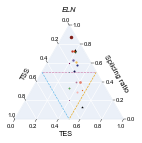

In [7]:
plot_major_iso_simplex(cerberus_h5, 'ELN')

## CTCF major transcripts simplex

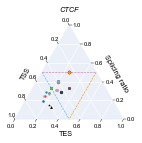

In [8]:
plot_major_iso_simplex(cerberus_h5, 'CTCF')

## E4F1 obs vs obs major density simplices

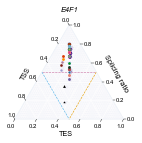

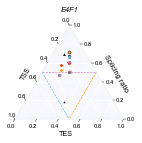

In [24]:
plot_obs_obs_major_density_simplex(cerberus_h5, 'E4F1')

## Transcript triplets labelled in figures

In [ ]:
ca = cerberus.read(cerberus_h5)

In [14]:
ca.triplets.loc[(ca.triplets.source=='sample_major')&\
                (ca.triplets['sample']=='lung')&\
                (ca.triplets.gname.isin(['ELN']))][['n_tss', 'splicing_ratio', 'n_tes']]

,n_tss,splicing_ratio,n_tes
77904,2.0,8.4,3.0


In [15]:
ca.triplets.loc[(ca.triplets.source=='sample_major')&\
                (ca.triplets['sample']=='h9_chondro')&\
                (ca.triplets.gname.isin(['ELN']))][['n_tss', 'splicing_ratio', 'n_tes']]

,n_tss,splicing_ratio,n_tes
24501,1.0,21.333333,2.0


In [13]:
ca.triplets.loc[(ca.triplets.source=='sample_major')&\
                (ca.triplets['sample']=='lung')&\
                (ca.triplets.gname.isin(['CTCF']))][['n_tss', 'splicing_ratio', 'n_tes']]

,n_tss,splicing_ratio,n_tes
79678,3.0,2.0,1.0


In [16]:
ca.triplets.loc[(ca.triplets.source=='obs_det')&\
                (ca.triplets.gname.isin(['E4F1']))][['n_tss', 'splicing_ratio', 'n_tes']]

,n_tss,splicing_ratio,n_tes
11578,4.0,3.714286,3.0


In [17]:
ca.triplets.loc[(ca.triplets.source=='obs_major')&\
                (ca.triplets.gname.isin(['E4F1']))][['n_tss', 'splicing_ratio', 'n_tes']]

,n_tss,splicing_ratio,n_tes
11578,2.0,6.666667,1.0


## Detected ELN isoforms

In [18]:
ca.triplets.loc[(ca.triplets.source=='sample_det')&\
                (ca.triplets['sample']=='h9_chondro')&\
                (ca.triplets.gname.isin(['ELN']))][['n_tss', 'splicing_ratio', 'n_tes', 'n_iso']]

,n_tss,splicing_ratio,n_tes,n_iso
24501,2.0,54.0,3.0,278.0
